<h1><strong><u>California Housing Market Model</u></strong></h1>

In [51]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, learning_curve, validation_curve, LearningCurveDisplay, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

<h2><strong><u>Data Preparation</u></strong></h2>

In [4]:
data = fetch_california_housing(as_frame=True)

In [5]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
X = data.data
y = data.target
display(X.head())
display(y.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [7]:
features = X.columns
print(X.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None


<h3><u>Data Visualization</u></h3>

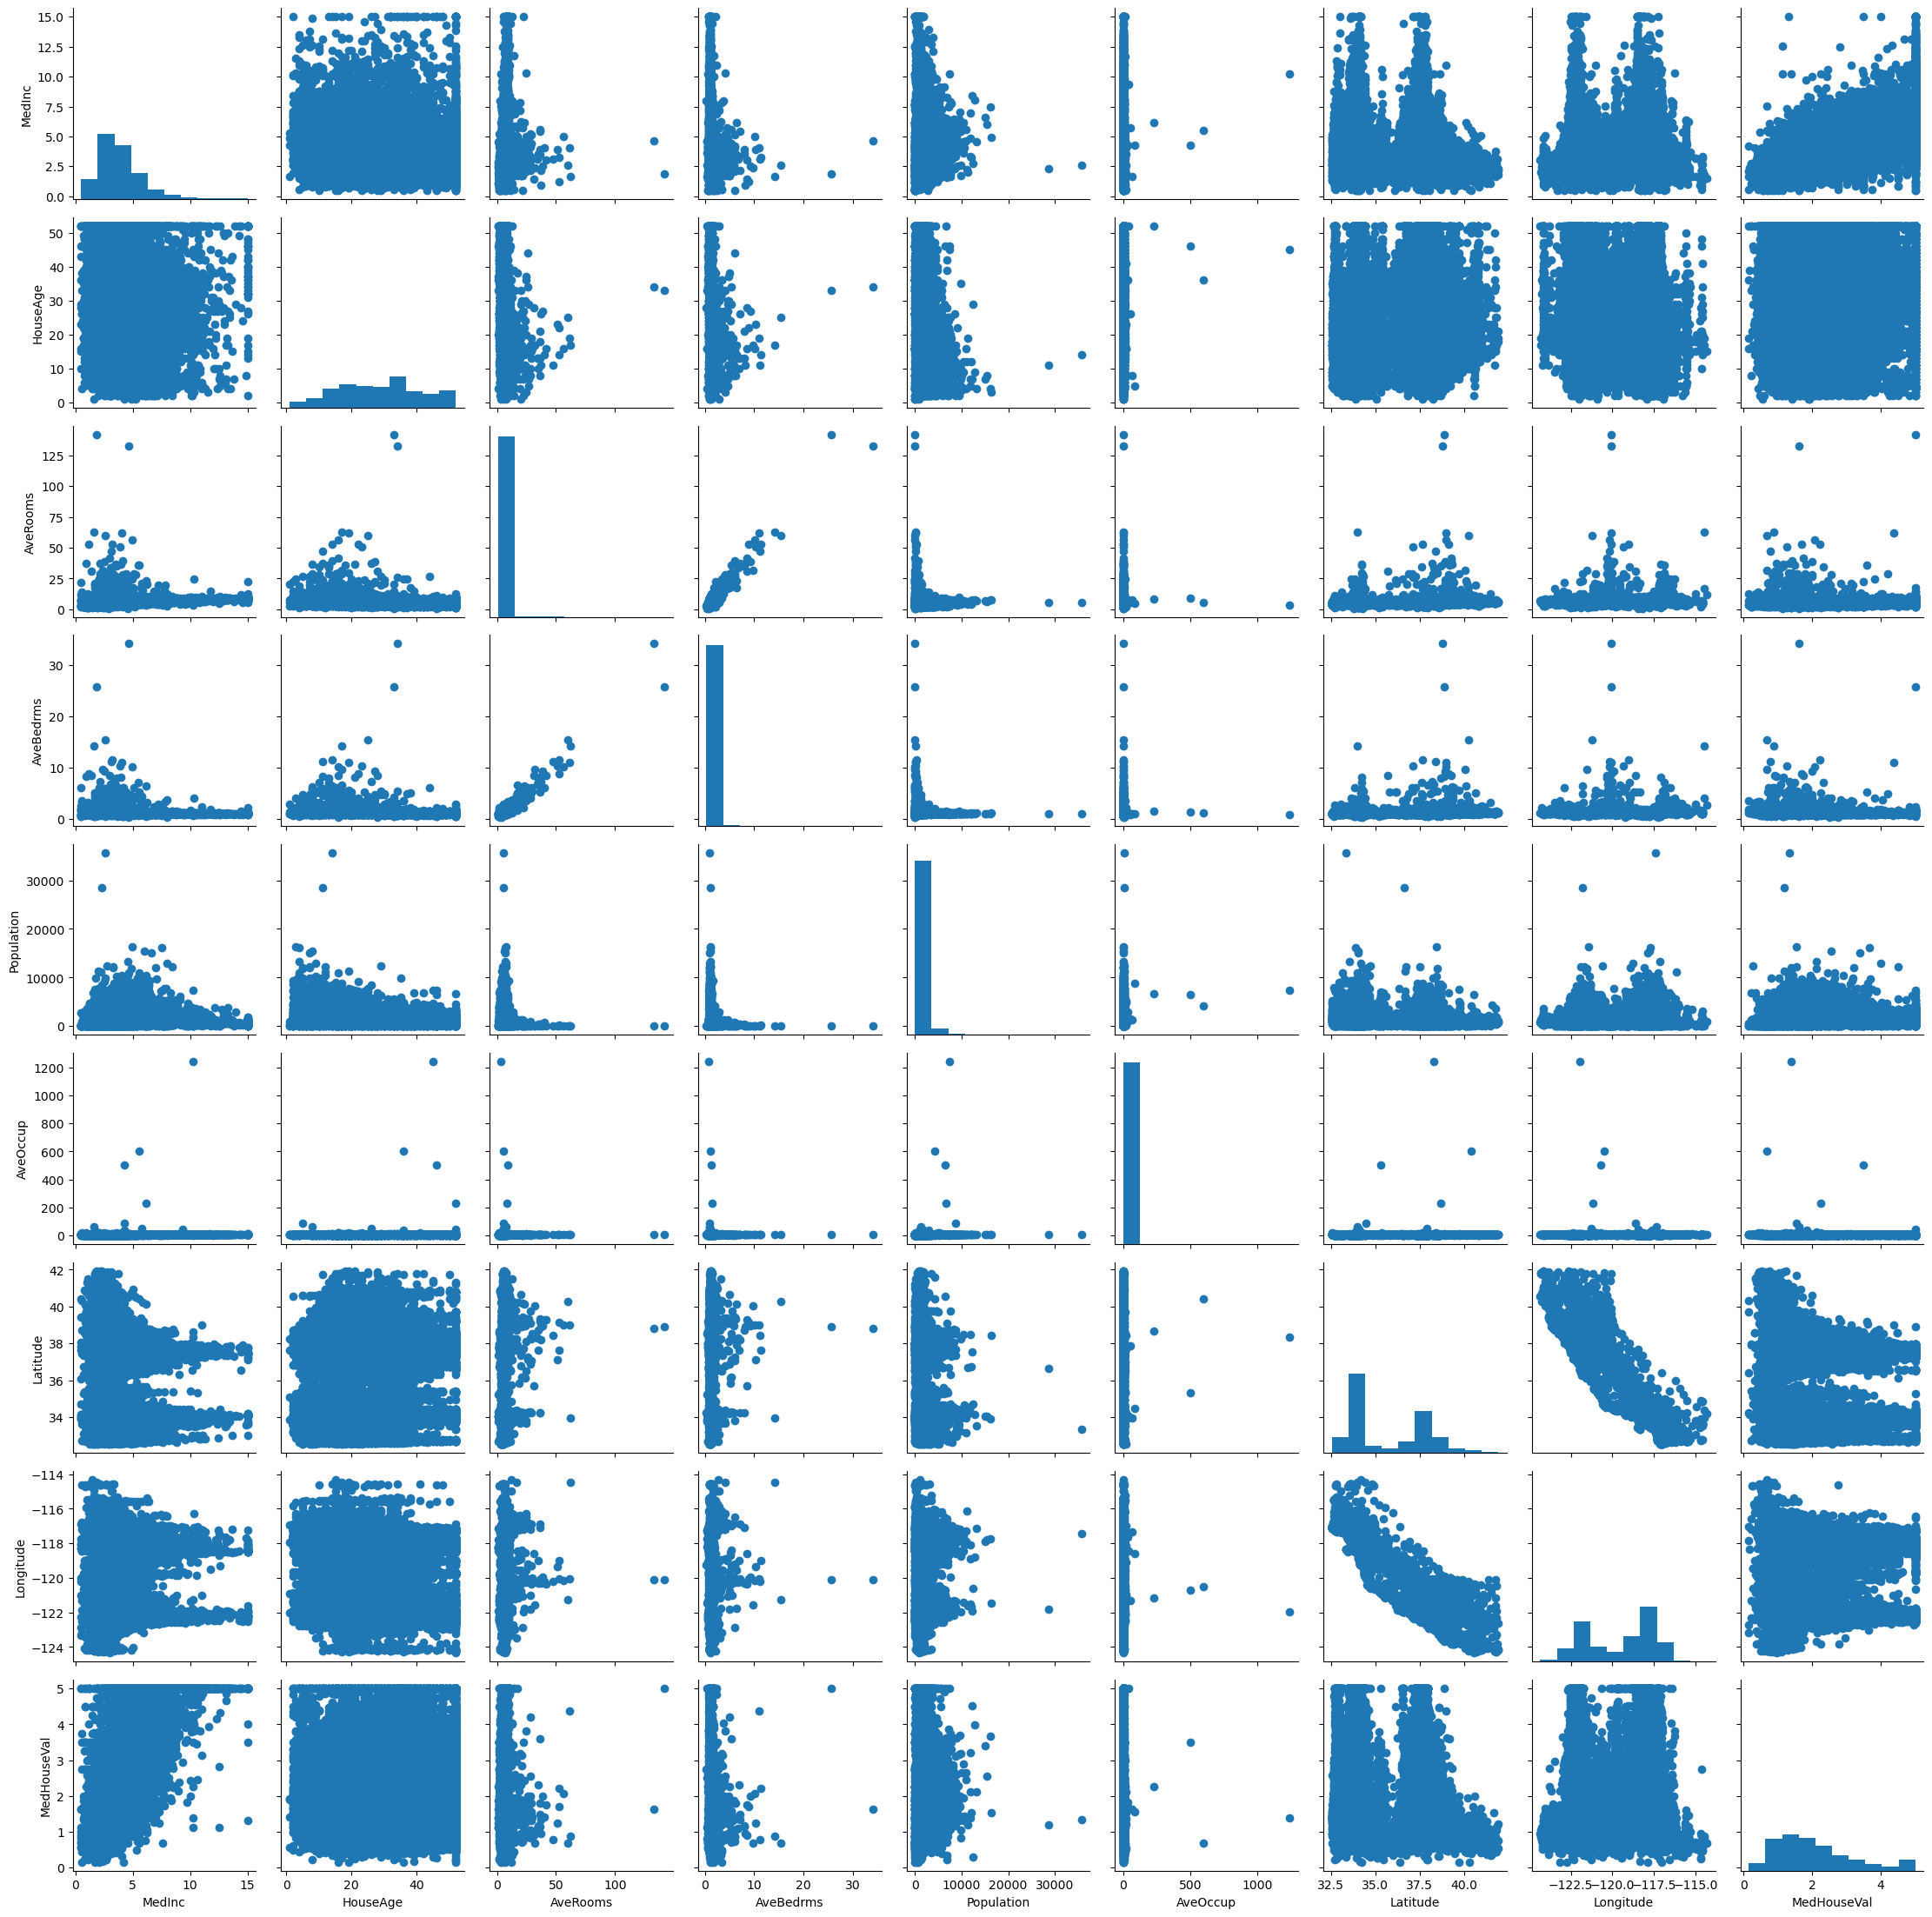

In [8]:
graphs = sns.PairGrid(data.frame)
graphs.map_diag(plt.hist)
graphs.map_offdiag(plt.scatter)

In [9]:
# X = X.drop(columns=['AveRooms', 'AveBedrms', 'Latitude', 'Longitude'], axis=1)

In [10]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
display(X_train.shape) 
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(15480, 8)

(5160, 8)

(15480,)

(5160,)

In [12]:
reg_metrics = {'Negative RMSE': 'neg_root_mean_squared_error', 'R-Squared': 'r2'}

<h2><strong><u>Linear Model Selection</u></strong><h2>

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END ..................................regr__max_depth=1; total time=   0.5s
[CV] END ..................................regr__max_depth=3; total time=   1.5s
[CV] END ..................................regr__max_depth=5; total time=   2.3s
[CV] END ..................................regr__max_depth=1; total time=   0.6s
[CV] END ..................................regr__max_depth=7; total time=   3.2s
[CV] END ..................................regr__max_depth=9; total time=   3.9s
[CV] END ..................................regr__max_depth=3; total time=   1.5s
[CV] END .................................regr__max_depth=11; total time=   4.6s
[CV] END .................................regr__max_depth=13; total time=   5.5s
[CV] END ..................................regr__max_depth=5; total time=   2.4s
[CV] END .................................regr__max_depth=15; total time=   5.8s
[CV] END .................................regr__max_depth=17; total time=   5.9s
[CV] END ...................

[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:   16.0s remaining:   16.0s


[CV] END .................................regr__max_depth=11; total time=   4.7s
[CV] END ..................................regr__max_depth=3; total time=   1.5s
[CV] END ..................................regr__max_depth=5; total time=   2.3s
[CV] END .................................regr__max_depth=13; total time=   5.1s
[CV] END ..................................regr__max_depth=7; total time=   3.0s
[CV] END .................................regr__max_depth=15; total time=   5.8s
[CV] END .................................regr__max_depth=17; total time=   6.1s
[CV] END ..................................regr__max_depth=9; total time=   3.8s
[CV] END .................................regr__max_depth=19; total time=   6.4s
[CV] END ..................................regr__max_depth=1; total time=   0.5s
[CV] END .................................regr__max_depth=11; total time=   4.4s
[CV] END ..................................regr__max_depth=3; total time=   1.5s
[CV] END ...................

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   29.8s finished


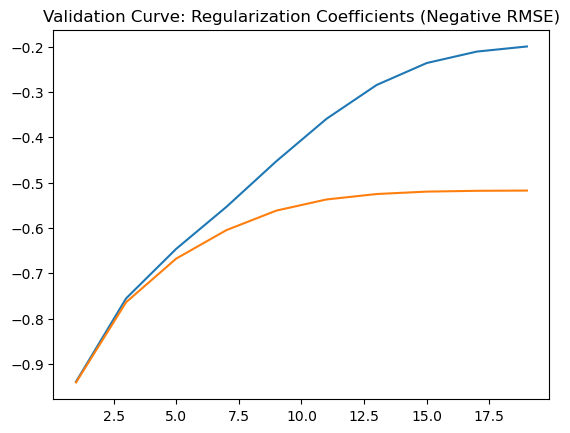

Exception ignored in: <function ResourceTracker.__del__ at 0x104689bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102badbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1029b5bc0>
Traceback (most recent call last

In [ ]:
lr_pipeline = Pipeline(
    [
        # ("pf", PolynomialFeatures(degree=3)),
        ("scale", StandardScaler()),
        ("regr", RandomForestRegressor())
    ]
)
depths = list(range(1, 21, 2))
train_scores, validation_scores = validation_curve(lr_pipeline, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error',
                                                   param_name="regr__max_depth",
                                                   param_range=depths,
                                                   verbose=2,
                                                   n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.title("Validation Curve: Regularization Coefficients (Negative RMSE)")
plt.plot(depths, train_scores_mean)
plt.plot(depths, validation_scores_mean)

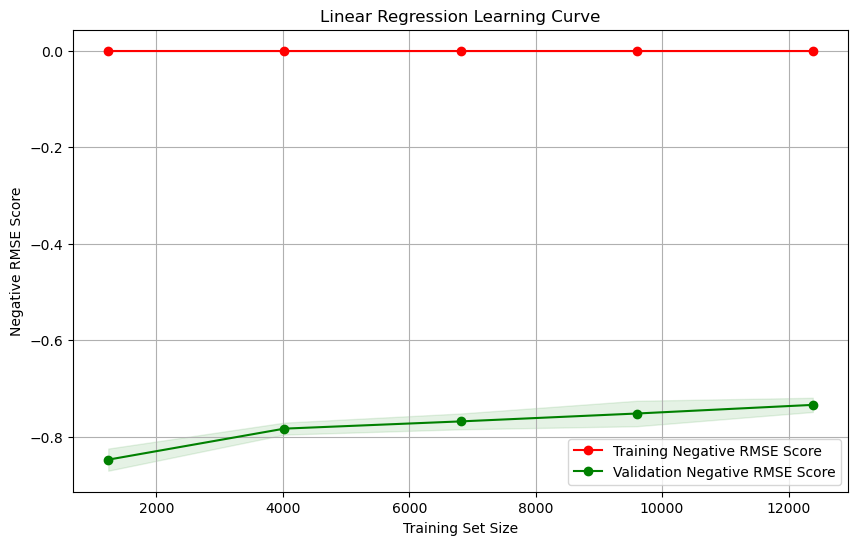

In [45]:
lr_train_sizes, lr_train_scores, lr_validation_scores = learning_curve(
    lr_pipeline,
    X_train,
    y_train,
    cv=5,  # Number of folds for cross-validation
    scoring='neg_root_mean_squared_error',  # Metric to evaluate the model
    n_jobs=-1,  # Use all available CPU cores
)

# Calculate mean and standard deviation for scores
lr_train_scores_mean = np.mean(lr_train_scores, axis=1)
lr_train_scores_std = np.std(lr_train_scores, axis=1)
lr_validation_scores_mean = np.mean(lr_validation_scores, axis=1)
lr_validation_scores_std = np.std(lr_validation_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title(f"Linear Regression Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Negative RMSE Score")
plt.grid()

plt.fill_between(lr_train_sizes, lr_train_scores_mean - lr_train_scores_std,
                lr_train_scores_mean + lr_train_scores_std, alpha=0.1,
                color="r")
plt.fill_between(lr_train_sizes, lr_validation_scores_mean - lr_validation_scores_std,
                lr_validation_scores_mean + lr_validation_scores_std, alpha=0.1,
                color="g")
plt.plot(lr_train_sizes, lr_train_scores_mean, 'o-', color="r",
            label=f"Training Negative RMSE Score")
plt.plot(lr_train_sizes, lr_validation_scores_mean, 'o-', color="g",
            label=f"Validation Negative RMSE Score")

plt.legend(loc="best")
plt.show()

<h3><strong><u>Evaluation Metrics</u></strong></h3>

In [32]:
for key, value in reg_metrics.items():
    print(f"{key}")
    training_values = cross_val_score(lr_pipeline, X_train, y=y_train, scoring=value, cv=5)
    print("CV Training Scores: ", training_values)
    training_values = np.array(training_values)
    average = np.mean(training_values)
    stDev = np.std(training_values)
    print(f"Training Average and Standard Error: ", "{:.2f}%".format(average.round(2)), "\u00B1", "{:.2f}%".format(stDev.round(4)*100), "\n")

Negative RMSE
CV Training Scores:  [-0.80007186 -0.81461837 -0.8243418  -0.77608802 -0.79296517]
Training Average and Standard Error:  -0.80% ± 1.68% 

R-Squared
CV Training Scores:  [0.52647574 0.51312174 0.50131252 0.53561527 0.51561248]
Training Average and Standard Error:  0.52% ± 1.17% 

